<a href="https://colab.research.google.com/github/skarot/MachineLearning/blob/main/Regression_SimpleLinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Labs

## Simple Linear Regression

### Importing Packages

In [12]:
!pip install pyodide

ERROR: Could not find a version that satisfies the requirement pyodide (from versions: none)
ERROR: No matching distribution found for pyodide


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Downloading data


In [2]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv \
      -P /tmp/

--2022-04-19 08:33:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘/tmp/FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K   279KB/s    in 0.3s    

2022-04-19 08:33:32 (279 KB/s) - ‘/tmp/FuelConsumptionCo2.csv’ saved [72629/72629]



In [44]:
%cd ..

/


In [45]:
!pwd

/


In [46]:
%cd tmp/

/tmp


In [47]:
!pwd

/tmp


Difference between ! and %
When you run a command with !, it directly executes a bash command in a subshell.

When you run a command with %, it executes one of the magic commands defined in IPython.

**NOTE** - !cd .. doesnot work but %cd .. works

### EDA

In [5]:
df = pd.read_csv('/tmp/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [23]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
display(cdf)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


#### Plot Features

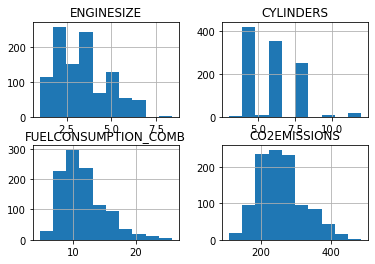

In [11]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

viz.hist()
plt.show()

#### Plot CO2 Emission wrt to EngineSize, Fuel Consumption and Cylinder 

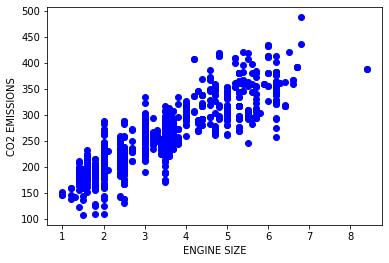

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()

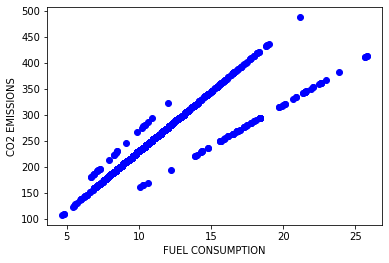

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUEL CONSUMPTION')
plt.ylabel('CO2 EMISSIONS')
plt.show()

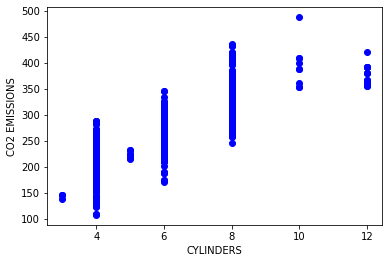

In [15]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSIONS')
plt.show()

### Creating train and test dataset

we use mask to split data such that 80% id used for training and 20% for testing, hence 0.8

In [18]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [33]:
from sklearn import linear_model 
regl = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regl.fit(train_x, train_y)
# print coedfficients
print("Coefficient= %f, intercept = %f" % (regl.coef_, regl.intercept_))

Coefficient= 39.724338, intercept = 123.451255


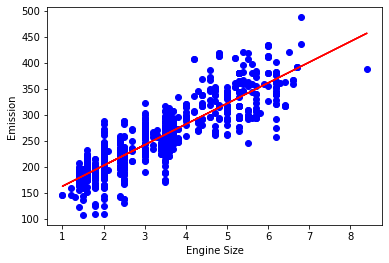

In [35]:
plt.scatter(train_x, train_y,color = 'blue')
plt.plot(train_x, (regl.coef_[0][0]*train_x+regl.intercept_[0]), color = 'red')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

### Model Evaluation

In [38]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regl.predict(test_x)
print("Mean absolute error = %f " % (np.mean(np.absolute(y_hat - test_y))))
print("Mean squared error = %f " % (np.mean(np.absolute(y_hat-test_y)**2)))
print("Root mean squared = %f" % r2_score(test_y, y_hat))


Mean absolute error = 20.216318 
Mean squared error = 711.821037 
Root mean squared = 0.787553
